In [1]:
# Import all the dependencies

import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as  mpl
import os
import math
import seaborn as sns
from matplotlib import pyplot

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import os
os.getcwd()

'C:\\Users\\intel'

In [5]:
os.chdir("D:/B.Tech/Github/spam-classfier")

In [6]:
os.getcwd()

'D:\\B.Tech\\Github\\spam-classfier'

In [5]:
import tarfile
import urllib.request
from urllib.request import urlretrieve
import shutil

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/" #Link of website

HAM_URL_1 = DOWNLOAD_ROOT + "20030228_easy_ham_2.tar.bz2" # Ham - Filenames

HAM_URL_2 = DOWNLOAD_ROOT + "20030228_hard_ham.tar.bz2" 

HAM_URL_3 = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"

SPAM_URL_1 = DOWNLOAD_ROOT + "20050311_spam_2.tar.bz2" # Spam - Filename

SPAM_URL_2 = DOWNLOAD_ROOT + "20030228_spam.tar.bz2" 

PATH = os.path.join("dataset", "tarfiles")

# Inside the directory we have two tarfiles, named ham.tar.bz2 and spam.tar.bz2
def fetch_data(url, path = PATH):
    
    # In if the directory is not present at the path, make a directory at that location
    if not os.path.isdir(path):
        os.makedirs(path)
    
    # Filname is the last string present after last '/'
    filename = url.rsplit('/', 1)[-1]
    # The location where tarfiles will be downloaded
    finalpath = os.path.join(path, filename)
    
    # If file is not present at the location, then get the file from the link
    try:
        tarfile.open(finalpath)
    except:
        urlretrieve(url, finalpath)
    
    # Standard process of extracting data out of a tarfile in a new directory
    with tarfile.open(finalpath) as tar:
        
        # New Directory is created
        dirname = os.path.join(tar.getnames()[0])
        
        # Since I had to run this program a several number of times, I don't want to download cloned copies of the 
        # same files in the same directory. Therefore, in order to get rid of the problem, I delete the directory
        # if already present inside my folder.
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
            
        tar.extractall(path = "dataset")
        
        # In every directory, there is a file named "cmds", which we don't want to use as it is a garbage file. 
        # Therfore we remove it.
        
        cmds_path = os.path.join(dirname, 'cmds')
        
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)
    
    return dirname

In [6]:
spam_dir_1 = fetch_data(SPAM_URL_1)
spam_dir_2 = fetch_data(SPAM_URL_2)

In [7]:
ham_dir_1 = fetch_data(HAM_URL_1)
ham_dir_2 = fetch_data(HAM_URL_2)
ham_dir_3 = fetch_data(HAM_URL_3)

In [7]:
ROOT = "D:/B.Tech/Github/spam-classfier/dataset"
HAM_DIR_1 = os.path.join(ROOT, "easy_ham_2")
HAM_DIR_2 = os.path.join(ROOT, "hard_ham")
HAM_DIR_3 = os.path.join(ROOT, "easy_ham")
SPAM_DIR_1 = os.path.join(ROOT, "spam_2")
SPAM_DIR_2 = os.path.join(ROOT, "spam")

In [8]:
# All filenames are very big in length (near around 40). Avoid any other garbage file if present.

ham_filenames_1 = [name for name in sorted(os.listdir(HAM_DIR_1)) if len(name) > 20]
ham_filenames_2 = [name for name in sorted(os.listdir(HAM_DIR_2)) if len(name) > 20]
ham_filenames_3 = [name for name in sorted(os.listdir(HAM_DIR_3)) if len(name) > 20]
spam_filenames_1 = [name for name in sorted(os.listdir(SPAM_DIR_1)) if len(name) > 20]
spam_filenames_2 = [name for name in sorted(os.listdir(SPAM_DIR_2)) if len(name) > 20]

In [9]:
len(ham_filenames_1), len(ham_filenames_2), len(ham_filenames_3), len(spam_filenames_1), len(spam_filenames_2)

(1400, 250, 2500, 1397, 500)

In [10]:
import email
import email.policy

def load_email(is_spam_1, is_spam_2, is_ham_1, is_ham_2, is_ham_3, filename, spam_path = ROOT):
    if is_spam_1:
        directory = "spam_2"
    elif is_spam_2:
        directory = "spam"
    elif is_ham_1: 
        directory = "easy_ham_2"
    elif is_ham_2:
        directory = "hard_ham"
    else:
        directory = "easy_ham" 
    
    files = []  # list of all the files
    with open(os.path.join(spam_path, directory, filename), "rb") as f:   # open file in binary format
        byte_content = f.read()                                           # read the file
        str_content = byte_content.decode('utf-8', errors='ignore')       # Convert the file into UTF-8 format
        files.append(str_content)                                         # Adding the UTF-8 format strong to our list
    return files

In [11]:
ham_emails_1 = [load_email(is_spam_1=False, is_spam_2=False, is_ham_1=True, is_ham_2=False, is_ham_3=False, filename=name) for name in ham_filenames_1]
ham_emails_2 = [load_email(is_spam_1=False, is_spam_2=False, is_ham_1=False, is_ham_2=True, is_ham_3=False, filename=name) for name in ham_filenames_2]
ham_emails_3 = [load_email(is_spam_1=False, is_spam_2=False, is_ham_1=False, is_ham_2=False, is_ham_3=True, filename=name) for name in ham_filenames_3]

spam_emails_1 = [load_email(is_spam_1=True, is_spam_2=False, is_ham_1=False, is_ham_2=False, is_ham_3=False, filename=name) for name in spam_filenames_1]
spam_emails_2 = [load_email(is_spam_1=False, is_spam_2=True, is_ham_1=False, is_ham_2=False, is_ham_3=False, filename=name) for name in spam_filenames_2]

In [12]:
# Demo examples of emails

print(ham_emails_1[0])

['Return-Path: <exmh-workers-admin@spamassassin.taint.org>\nDelivered-To: yyyy@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7106643C34\n\tfor <jm@localhost>; Wed, 21 Aug 2002 08:33:03 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Wed, 21 Aug 2002 13:33:03 +0100 (IST)\nReceived: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LCXvZ24654 for\n    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 13:33:57 +0100\nReceived: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by\n    listman.redhat.com (Postfix) with ESMTP id F12A13EA25; Wed, 21 Aug 2002\n    08:34:00 -0400 (EDT)\nDelivered-To: exmh-workers@listman.spamassassin.taint.org\nReceived: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.o

In [13]:
import sklearn.utils
from sklearn.model_selection import train_test_split

X = spam_emails_1 + spam_emails_2 + ham_emails_1 + ham_emails_2 + ham_emails_3
y = np.concatenate((np.ones(len(spam_emails_1) + len(spam_emails_2)), np.zeros(len(ham_emails_1) + len(ham_emails_2) + len(ham_emails_3))))

# shuffle the dataset at fixed seed
X, y = sklearn.utils.shuffle(X, y, random_state = 42)

In [14]:
# Some classification problems do not have a balanced number of examples for each class label. 
# As such, it is desirable to split the dataset into train and test sets in a way that preserves the same 
# proportions of examples in each class as observed in the original dataset.

# This is known as stratified train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [15]:
print(len(X_train), len(y_train)) # training
print(len(X_test), len(y_test)) # testing

4837 4837
1210 1210


In [16]:
# This technique has been given in Hands on Tensorflow and Keras by O'Reilly

import re 
# Python Regular Expression (Regex)

# Boolean function to check whether a string is a url or not
def regex_url(s):
    url = re.match("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|"
            "[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-zA-Z]))+", s)
    return url is not None

# Per word from string "words" we will check first that it a url or not and then replace it with string "URL"
def url_to_word(words):
    for i, word in enumerate(words):
        if regex_url(word):
            words[i] = "URL"
    return words

In [17]:
def remove_punctuation(email):
    
    temp_email = ""
    
    for c in email:
        if c.isalnum() or c.isspace(): # Only space and alpha-numeric characters are included. 
            temp_email += c
            
    return temp_email

In [18]:
import glob

# This means take that portion of the email, before which two enters have been encountered
def remove_header(email):
    return email[0][email[0].find('\n\n') : ]  

In [19]:
def num_to_word(words):
    # Convert all numbers to word "NUM"
    
    for i, word in enumerate(words):
        
        if word.isdigit():
            words[i] = 'NUM'
    
    return words

In [20]:
# Custom Transformer using sklearn
from sklearn.base import BaseEstimator, TransformerMixin

class Email_Features(BaseEstimator, TransformerMixin):
    
    def __init__(self, url_to_word=True, to_lowercase=True, num_to_word=True, no_header=True, remove_punc=True):
        
        self.url_to_word = url_to_word
        self.to_lowercase = to_lowercase
        self.num_to_word = num_to_word
        self.no_header = no_header
        self.remove_punc = remove_punc
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        
        X_final = []
        
        for email in X:
            
            if self.no_header:
                email = remove_header(email)
            
            if self.to_lowercase:
                email = email.lower()
            
            email_words = email.split() # Split by spaces
            
            if self.url_to_word:
                email_words = url_to_word(email_words)
            
            if self.num_to_word:
                email_words = num_to_word(email_words)
            
            email = ' '.join(email_words) # Concatenate the splitted string, seperated by ' '
            
            if self.remove_punc:
                email = remove_punctuation(email)
            
            X_final.append(email)
            
        return X_final

In [21]:
from sklearn.pipeline import Pipeline

# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer 

# Full Pipeline of Data Preparation
prepare_pipeline = Pipeline([
    ('feature_extraction', Email_Features()),
    ('word_set', CountVectorizer())  # vector of count of all the words in the text
])

"""
Example of Count Vectoriser: 
corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]

>>> vectorizer = CountVectorizer()

>>> X = vectorizer.fit_transform(corpus)

>>> print(vectorizer.get_feature_names())
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

"""

"\nExample of Count Vectoriser: \ncorpus = [\n...     'This is the first document.',\n...     'This document is the second document.',\n...     'And this is the third one.',\n...     'Is this the first document?',\n... ]\n\n>>> vectorizer = CountVectorizer()\n\n>>> X = vectorizer.fit_transform(corpus)\n\n>>> print(vectorizer.get_feature_names())\n['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']\n\n"

In [22]:
X_train_final = prepare_pipeline.fit_transform(X_train)

In [37]:
X_test_final = prepare_pipeline.fit_transform(X_test)

In [23]:
print(X_train_final.shape)

(4837, 125925)


In [38]:
print(X_test_final.shape)

(1210, 49023)


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# We are going to evaluate our model in terms of precision, accuracy, f1_score and recall metrics.
def evaluate(y_predicted, y_theoretical = y_train):
    
    conf_matrix = confusion_matrix(y_theoretical, y_predicted)
    
    precision = precision_score(y_theoretical, y_predicted)
    
    recall = recall_score(y_theoretical, y_predicted)
    
    f1 = f1_score(y_theoretical, y_predicted)
    
    return {'precision': precision, 'recall': recall, 'f1_score': f1, 'c_matrix': conf_matrix}

In [25]:
from sklearn.neural_network import MLPClassifier

# Number of neurons in layer
mlp_clf = MLPClassifier(hidden_layer_sizes = (16,))

classifiers = {
    'MLP': mlp_clf,
}

In [26]:
# Predictions per model

from sklearn.model_selection import cross_val_predict

y_predictions = {}
for classifier_name, classifier in classifiers.items():
    # Dictionary of predictions made my each classifier
    y_predictions[classifier_name] = cross_val_predict(classifier, X_train_final, y_train, cv = 3)

In [28]:
from sklearn.metrics import accuracy_score

# evaluate each classifier's accuracy
for classifier_name, y_predicted in y_predictions.items():
    print("Classifier Used: {}".format(classifier_name))
    print("Accuracy Score: ", accuracy_score(y_train, y_predicted), "\n")

Classifier Used: MLP
Accuracy Score:  0.9797395079594791 



In [29]:
# Evaluation of Classifier on the basis of Confusion Matrix, Precision,
# recall and f1_score

for classifier_name, y_predicted in y_predictions.items():
    
    metrics = evaluate(y_predicted)
    
    print("Classifier : {}".format(classifier_name))
    
    print("Precision: {}".format(metrics['precision']))
    
    print("Recall: {}".format(metrics['recall']))
    
    print("f1-score: {}".format(metrics['f1_score']))
    
    print("Confusion Matrix: \n {}".format(metrics['c_matrix']), "\n")
    

Classifier : MLP
Precision: 0.9816700610997964
Recall: 0.9531970995385629
f1-score: 0.9672240802675586
Confusion Matrix: 
 [[3293   27]
 [  71 1446]] 



In [30]:
# calculate scores for each model
scores = {}

for classifier_name, classifier in classifiers.items():
    method = 'predict_proba'

    if not hasattr(classifier, 'predict_proba') and hasattr(classifier, 'decision_function'):
        method = 'decision_function'
        
    scores[classifier_name] = cross_val_predict(classifier, X_train_final, y_train, cv = 3, method = method) #default is 'predict'
    
    if method == 'predict_proba':
        scores[classifier_name] = scores[classifier_name][:, 1]


In [31]:
# Let us make our Neural Network Model reach perfection - Optimization

from sklearn.model_selection import GridSearchCV

# fine-tune MLP classifier
mlp_optimised = MLPClassifier()
search_space = {
    'hidden_layer_sizes': [(16,), (16, 16), (32,)],
    'activation': ['relu', 'tanh', 'logistic']
}

mlp_grid_search = GridSearchCV(mlp_optimised, search_space, 'f1', cv = 5, verbose = 2) #Scoring will be done on the basis of f1_score

mlp_grid_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] activation=relu, hidden_layer_sizes=(16,) .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ activation=relu, hidden_layer_sizes=(16,), total= 1.1min
[CV] activation=relu, hidden_layer_sizes=(16,) .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ........ activation=relu, hidden_layer_sizes=(16,), total= 1.0min
[CV] activation=relu, hidden_layer_sizes=(16,) .......................
[CV] ........ activation=relu, hidden_layer_sizes=(16,), total= 1.1min
[CV] activation=relu, hidden_layer_sizes=(16,) .......................
[CV] ........ activation=relu, hidden_layer_sizes=(16,), total= 1.1min
[CV] activation=relu, hidden_layer_sizes=(16,) .......................
[CV] ........ activation=relu, hidden_layer_sizes=(16,), total= 1.2min
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................
[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=  56.9s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................
[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total= 1.1min
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................
[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=  56.6s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 80.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=

In [32]:
mlp_best = mlp_grid_search.best_estimator_

In [33]:
import pickle
filename = "spam_classifier_best.sav"
pickle.dump(mlp_best, open(filename, 'wb'))

In [34]:
model = pickle.load(open(filename, 'rb'))

In [35]:
y_predicted = mlp_best.predict(X_train_final)

temp = evaluate(y_predicted, y_train)
print("Multi Layer Perceptron Classifier:")
print("accuracy: {}".format(accuracy_score(y_predicted, y_train)))
print("precision: {}".format(temp['precision']))
print("recall: {}".format(temp['recall']))
print("f1-score: {}".format(temp['f1_score']))
print("Confusion Matrix: \n", temp['c_matrix'])

Multi Layer Perceptron Classifier:
accuracy: 0.9995865205706016
precision: 1.0
recall: 0.998681608437706
f1-score: 0.99934036939314
Confusion Matrix: 
 [[3320    0]
 [   2 1515]]


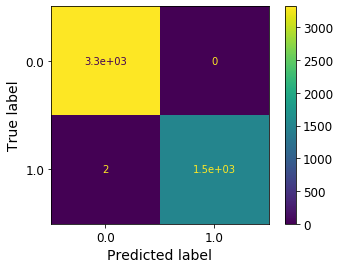

In [42]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_best, X_train_final, y_train)  
plt.show()

In [41]:
# End of program

# Conclusions:  -
#     1. With accuracy, precision, recall, f1_score and roc_auc as our estimators, we trained and tested MLP.
#     2. Then I optimised it using Grid Search CV and got the best hyper-parameters for my model.
#     3. Then I saved my best model for Spam Classifier and predicted using the best hyper-parameters.

In [ ]:
---------------------------------------------------------------------------------------------------------------------------